In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv("cc1/airline_satisfaction.csv")
df.drop('Unnamed: 0', inplace = True, axis=1)
df =df.dropna()
df = df.reset_index()

In [2]:
ordinal = ["Departure/Arrival time convenient","Ease of Online booking","Gate location",
           "Food and drink","Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service",
           "Baggage handling","Checkin service","Inflight service","Cleanliness"]
df["Note_totale"]=df["Inflight wifi service"]
print(len(ordinal))
for i in ordinal:
    df["Note_totale"]+=df[i]

13


In [3]:
ordinal += ["Inflight wifi service"]
target=["satisfaction"]
quantitative =["Arrival Delay in Minutes","Departure Delay in Minutes","Age","Flight Distance","Note_totale"]#"Arrival Delay in Minutes","Departure Delay in Minutes",
ordinal+=["Class"]
qualitative=["Gender","Customer Type","Type of Travel"]
features=quantitative+qualitative+ordinal

In [7]:
X_qualitative = df[qualitative].values
X_ordinal = df[ordinal].values
X_quantitative = df[quantitative].values
y=df[target].values

In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
X_qualitative_preprocessed=encoder.fit_transform(X_qualitative)
X_qualitative_preprocessed.toarray()

array([[0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 1., 0.],
       ...,
       [1., 0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1.]])

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_vars = []
for categorical_var in X_ordinal.T:
    encoded_vars.append(label_encoder.fit_transform(categorical_var))
X_ordinal = np.array(encoded_vars).T

In [20]:
X = np.concatenate([X_qualitative_preprocessed.toarray(),X_ordinal,X_quantitative],axis=1)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [24]:
arbre_decision = DecisionTreeClassifier()
arbre_decision.fit(X,y)
predictions=arbre_decision.predict(X)
print(classification_report(predictions,y))

                         precision    recall  f1-score   support

neutral or dissatisfied       1.00      1.00      1.00     73225
              satisfied       1.00      1.00      1.00     56262

               accuracy                           1.00    129487
              macro avg       1.00      1.00      1.00    129487
           weighted avg       1.00      1.00      1.00    129487



In [26]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeClassifier = DecisionTreeClassifier(criterion="gini",random_state=0)
#decisionTreeClassifier.fit_transform(X,y)
from sklearn.model_selection import cross_val_score
cross_val_accuracy = cross_val_score(estimator=decisionTreeClassifier, X=X,y=y,cv=10,scoring="accuracy")
print(cross_val_accuracy.mean())
cross_val_precision = cross_val_score(estimator=decisionTreeClassifier, X=X,y=y,cv=10,scoring="precision_macro")
print(cross_val_precision.mean())
cross_val_recall = cross_val_score(estimator=decisionTreeClassifier, X=X, y=y, cv=10, scoring="recall_macro")
print(cross_val_recall.mean())

0.9469213351024944
0.94584843747897
0.946209680959706


In [28]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeClassifier = DecisionTreeClassifier(criterion="entropy",random_state=0)
#decisionTreeClassifier.fit_transform(X,y)
from sklearn.model_selection import cross_val_score
cross_val_accuracy = cross_val_score(estimator=decisionTreeClassifier, X=X,y=y,cv=10,scoring="accuracy")
print(cross_val_accuracy.mean())
cross_val_precision = cross_val_score(estimator=decisionTreeClassifier, X=X,y=y,cv=10,scoring="precision_macro")
print(cross_val_precision.mean())
cross_val_recall = cross_val_score(estimator=decisionTreeClassifier, X=X, y=y, cv=10, scoring="recall_macro")
print(cross_val_recall.mean())

0.9480488633278726
0.9470423985257186
0.9472828452117742


In [35]:
from sklearn.model_selection import GridSearchCV
decision_tree_classifier=DecisionTreeClassifier()
grid_search_cv = GridSearchCV(estimator=decision_tree_classifier,
                              param_grid={"criterion": ["gini", "entropy"],
                                         "max_features": [1, 2, 3,4,5,6,7,8,9,10],
                                         "max_depth": range(1, 20, 1)})
grid_search_cv.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [81]:
from sklearn.model_selection import GridSearchCV
decision_tree_classifier=DecisionTreeClassifier()
grid_search_cv = GridSearchCV(estimator=decision_tree_classifier,
                              param_grid={"criterion": ["gini", "entropy"],
                                         "max_features": [1, 2, 3,4,5,6,7,8,9,10],
                                         "max_depth": range(1, 7, 1)})
grid_search_cv.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 7),
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [36]:
print(grid_search_cv.best_params_)# avec 20

{'criterion': 'entropy', 'max_depth': 17, 'max_features': 10}


In [37]:
print(grid_search_cv.best_score_)# avec 20

0.9515859117575127


In [82]:
print(grid_search_cv.best_params_)# avec 10

{'criterion': 'gini', 'max_depth': 6, 'max_features': 10}


In [83]:
print(grid_search_cv.best_score_)# avec 10

0.9168101253862894


In [112]:
decisiontree=DecisionTreeClassifier(criterion="entropy", max_depth=7,max_features=10)
decisiontree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=10)

In [110]:
from sklearn.model_selection import cross_val_score
decisiontree=DecisionTreeClassifier(criterion="entropy", max_depth=7,max_features=10)
cross_val_NB_precision=cross_val_score(estimator=decisiontree,X=X,y=y,cv=5,scoring="precision_macro")
cross_val_NB_recall=cross_val_score(estimator=decisiontree,X=X,y=y,cv=5,scoring="recall_macro")
cross_val_NB_accuracy=cross_val_score(estimator=decisiontree,X=X,y=y,cv=5,scoring="accuracy")

In [103]:
cross_val_NB_precision

array([0.80693315, 0.81922729, 0.84598556, 0.810319  , 0.85508628])

In [104]:
cross_val_NB_recall

array([0.81097276, 0.85712729, 0.83594626, 0.83406849, 0.80620774])

In [105]:
cross_val_NB_accuracy

array([0.85481504, 0.81114372, 0.80074912, 0.81337607, 0.82028806])

0  :  x0_Female
1  :  x0_Male
2  :  x1_Loyal Customer
3  :  x1_disloyal Customer
4  :  x2_Business travel
5  :  x2_Personal Travel
6  :  Departure/Arrival time convenient
7  :  Ease of Online booking
8  :  Gate location
9  :  Food and drink
10  :  Online boarding
11  :  Seat comfort
12  :  Inflight entertainment
13  :  On-board service
14  :  Leg room service
15  :  Baggage handling
16  :  Checkin service
17  :  Inflight service
18  :  Cleanliness
19  :  Inflight wifi service
20  :  Class
21  :  Arrival Delay in Minutes
22  :  Departure Delay in Minutes
23  :  Age
24  :  Flight Distance
25  :  Note_totale


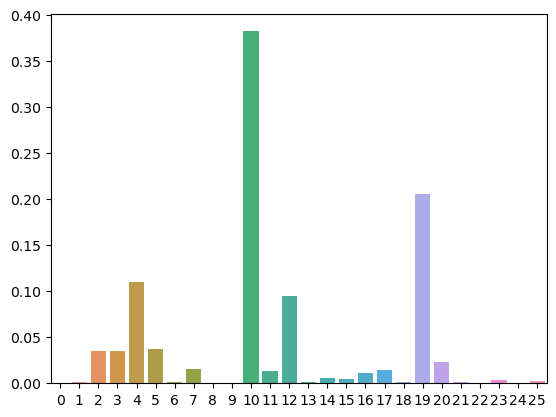

In [114]:
import seaborn as sns
feature_names = encoder.get_feature_names_out().tolist()+ordinal+quantitative
for i in range(0,26):
    print(i, " : ",feature_names[i])
#print(feature_names)
g = sns.barplot(x=list(range(len(decisiontree.feature_importances_))),
            y=decisiontree.feature_importances_)
#g.set_xticklabels(feature_names)

In [44]:
from sklearn.tree import plot_tree

[Text(0.3627996575342466, 0.9375, 'X[10] <= 3.5\nentropy = 0.988\nsamples = 129487\nvalue = [73225, 56262]'),
 Text(0.08476027397260275, 0.8125, 'X[19] <= 0.5\nentropy = 0.61\nsamples = 65193\nvalue = [55408, 9785]'),
 Text(0.02054794520547945, 0.6875, 'X[7] <= 2.0\nentropy = 0.041\nsamples = 2244\nvalue = [10, 2234]'),
 Text(0.0136986301369863, 0.5625, 'X[7] <= 0.5\nentropy = 0.015\nsamples = 2237\nvalue = [3, 2234]'),
 Text(0.00684931506849315, 0.4375, 'entropy = 0.0\nsamples = 2102\nvalue = [0, 2102]'),
 Text(0.02054794520547945, 0.4375, 'X[18] <= 0.5\nentropy = 0.154\nsamples = 135\nvalue = [3, 132]'),
 Text(0.0136986301369863, 0.3125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.0273972602739726, 0.3125, 'entropy = 0.0\nsamples = 132\nvalue = [0, 132]'),
 Text(0.0273972602739726, 0.5625, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.14897260273972604, 0.6875, 'X[19] <= 3.5\nentropy = 0.529\nsamples = 62949\nvalue = [55398, 7551]'),
 Text(0.07534246575342465, 0.5

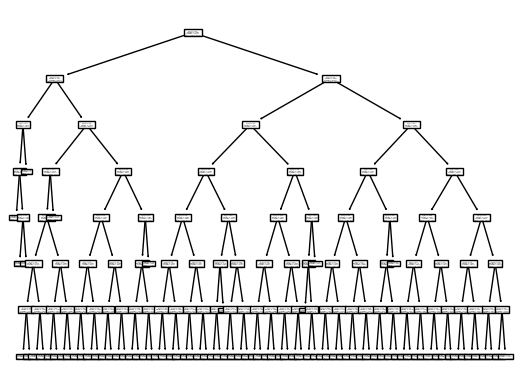

In [113]:
plot_tree(decisiontree)